In [1]:
import math
import pandas as pd
import numpy as np
np.random.seed(42)
from collections import OrderedDict

%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.size'] = 16

matplotlib.rcParams['figure.figsize'] = (9,9)

import seaborn as sns

from IPython.core.pylabtools import figsize

from scipy.stats import percentileofscore
from scipy import stats

In [2]:
df = pd.read_csv('../dataset/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [3]:
df.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06
mean,8.185688e+11,1.157350e+01,1.689111e+02,6.807467e-02,4.469578e+00,8.985294e-01,-1.754218e-03,4.358774e-04,-2.671857e-04,4.824088e+03,9.009763e+00
std,4.951339e+11,8.665737e+01,1.072641e+02,1.426141e+00,8.129320e+00,3.249632e+00,1.430876e-01,3.460380e-01,1.525665e-01,1.617019e+06,8.106659e+00
min,0.000000e+00,7.500000e-01,0.000000e+00,-3.344084e+01,-5.730359e+01,-7.844842e+01,-2.644802e+01,-5.734489e+01,-5.355445e+01,0.000000e+00,-1.719776e+00
25%,3.779571e+11,3.900000e+00,7.800000e+01,-5.087678e-01,-1.995674e+00,-9.265844e-01,-2.686586e-02,-2.983093e-02,-1.867207e-02,2.420000e+02,1.019846e+00
50%,8.074539e+11,4.259000e+00,1.682945e+02,6.130981e-02,9.082103e+00,7.807281e-01,-6.597335e-04,2.746582e-04,-3.051758e-05,5.200000e+02,7.540000e+00
75%,1.254130e+12,8.000000e+00,2.624448e+02,6.344828e-01,9.710000e+00,2.753416e+00,2.333505e-02,3.141879e-02,1.825624e-02,8.630000e+02,1.548176e+01
max,1.709397e+12,6.063000e+03,3.599985e+02,2.961647e+01,7.281000e+01,7.331421e+01,1.068810e+01,6.254202e+01,3.383183e+01,6.193165e+08,5.055000e+01


In [4]:
def count_nulls(df):
    null_counter = df.isnull().sum(axis=0)
    null_counter = null_counter[null_counter > 0]
    null_percent = df.isnull().sum(axis=0) / df.shape[0] * 100
    null_percent = null_percent[null_percent > 0]
    null_df = pd.concat([null_counter,null_percent],axis=1)
    null_df.columns = ['count','percent']
    display(null_df)

In [6]:
count_nulls(df)

,count,percent


In [7]:
# str_target_var="bookingId"
# ls_num_data = [col for col in df.columns if df[col].dtype != "object" and col != str_target_var]
# ncols = 3
# nrows = int(math.ceil(len(ls_num_data) * 1.0 / ncols))
# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# # Visualization of numerical data
# for idx, var in enumerate(ls_num_data):
#     i = idx / ncols
#     j = idx % ncols
#     axes[i, j].get_xaxis().get_label().set_visible(False)
#     df.boxplot(column=var, by=str_target_var, ax=axes[i, j])
df.dtypes

bookingID           int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
dtype: object

In [10]:
df[df["bookingID"]==1202590843006].count

<bound method DataFrame.count of              bookingID  Accuracy  Bearing  acceleration_x  acceleration_y  \
0        1202590843006     3.000    353.0        1.228867        8.900100   
36004    1202590843006     3.033     77.0        1.137217        8.975278   
37792    1202590843006     6.173    283.0        1.522818        7.947064   
57021    1202590843006     3.014    353.0        1.134775        8.932489   
76231    1202590843006     5.209    340.0        0.858197        9.078037   
93956    1202590843006     3.014    326.0        1.030723        9.093197   
101646   1202590843006     3.000    315.0        0.938498        8.735906   
122477   1202590843006    16.027    135.0        1.618471        7.706810   
130810   1202590843006     3.021     75.0        0.459601        8.632447   
188511   1202590843006    13.021    343.0        1.998440        9.150648   
193292   1202590843006    12.248     11.0        1.943565        9.069370   
213583   1202590843006     6.413    338.0  

In [13]:
df1 = pd.read_csv('../dataset/features/part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df2 = pd.read_csv('../dataset/features/part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df3 = pd.read_csv('../dataset/features/part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df4 = pd.read_csv('../dataset/features/part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df5 = pd.read_csv('../dataset/features/part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df6 = pd.read_csv('../dataset/features/part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df7 = pd.read_csv('../dataset/features/part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df8 = pd.read_csv('../dataset/features/part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df9 = pd.read_csv('../dataset/features/part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')

In [14]:
print(df1[df1["bookingID"]==1202590843006].shape)
print(df2[df2["bookingID"]==1202590843006].shape)
print(df3[df3["bookingID"]==1202590843006].shape)
print(df4[df4["bookingID"]==1202590843006].shape)
print(df5[df5["bookingID"]==1202590843006].shape)
print(df6[df6["bookingID"]==1202590843006].shape)
print(df7[df7["bookingID"]==1202590843006].shape)
print(df8[df8["bookingID"]==1202590843006].shape)
print(df9[df9["bookingID"]==1202590843006].shape)

(120, 11)
(103, 11)
(115, 11)
(110, 11)
(119, 11)
(96, 11)
(119, 11)
(123, 11)
(127, 11)


In [15]:
import glob

path = r'../dataset/features' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [16]:
frame.shape

(16135561, 11)

In [17]:
df_book1 = frame[frame["bookingID"]==1202590843006]
df_book1.shape

(1151, 11)

In [18]:
print(df_book1["second"].max())
print(df_book1["second"].min())

1514.0
0.0


In [19]:
df_book1[df_book1["second"]==22]

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
15257460,1202590843006,8.066,315.0,1.629647,8.689114,5.036654,0.091001,-0.007697,-0.007854,22.0,10.702716


In [20]:
df_book1=df_book1.sort_values('second')
df_book1_sec=df_book1.set_index('second')
df_book1_sec.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed
second,,,,,,,,,,
0.0,1202590843006,3.024,316.0,1.438092,9.016305,3.961360,0.014591,0.007051,0.007191,0.0
1.0,1202590843006,3.022,316.0,1.164760,8.577515,3.941843,0.007924,-0.011746,-0.015464,0.0
2.0,1202590843006,3.019,316.0,1.168935,8.514557,3.600678,0.439840,-0.056287,-0.064804,0.0
3.0,1202590843006,3.018,316.0,1.504823,8.948865,3.965516,-0.010978,0.010629,0.002356,0.0
4.0,1202590843006,3.017,316.0,1.405559,9.003942,3.923254,0.015446,-0.005725,-0.002025,0.0


<IPython.core.display.Javascript object>


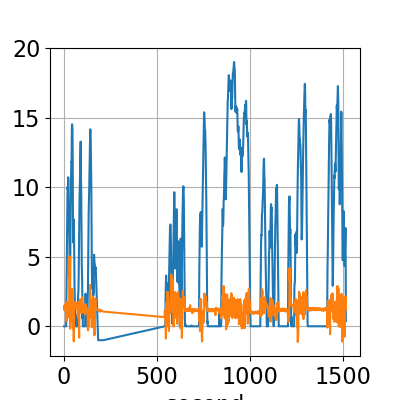

In [22]:
matplotlib.rcParams['figure.figsize'] = (4,4)

df_book1_sec['Speed'].plot(grid=True)

In [23]:
df_book1_sec['acceleration_x'].plot(grid=True)

In [24]:
df_book1[df_book1["Speed"]<0]

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
3860868,1202590843006,17.330,0.0,1.118686,9.006010,4.575827,0.000611,-0.030281,-0.027995,183.0,-1.0
9344222,1202590843006,33.414,0.0,1.212577,8.986129,4.122911,0.007226,0.009198,-0.005725,190.0,-1.0
12285570,1202590843006,18.656,0.0,1.042215,8.892363,4.014090,0.002862,-0.010105,0.004765,192.0,-1.0
5870654,1202590843006,20.963,0.0,1.160728,8.941960,4.052761,0.007034,0.005864,-0.003875,200.0,-1.0
3373543,1202590843006,16.023,0.0,1.090339,9.162466,3.673424,-0.061366,-0.024801,-0.017209,201.0,-1.0
3938698,1202590843006,24.692,0.0,1.057825,8.924645,4.019759,-0.008884,-0.013038,-0.012392,211.0,-1.0


In [25]:
frame.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07
mean,8.184819e+11,1.161035e+01,1.689684e+02,6.914529e-02,4.468976e+00,8.942974e-01,-1.710847e-03,2.800733e-04,-2.569688e-04,3.803484e+03,9.006543e+00
std,4.952476e+11,8.691672e+01,1.072966e+02,1.424161e+00,8.130664e+00,3.251549e+00,1.445619e-01,3.400630e-01,1.480824e-01,1.436686e+06,8.106415e+00
min,0.000000e+00,7.500000e-01,0.000000e+00,-7.841969e+01,-7.299412e+01,-7.844842e+01,-4.845575e+01,-7.488861e+01,-5.355445e+01,0.000000e+00,-2.000000e+00
25%,3.779571e+11,3.900000e+00,7.800000e+01,-5.081238e-01,-2.022476e+00,-9.316101e-01,-2.678888e-02,-2.993851e-02,-1.876500e-02,2.410000e+02,1.020000e+00
50%,8.074539e+11,4.250000e+00,1.688700e+02,6.137085e-02,9.081485e+00,7.757450e-01,-6.432411e-04,2.645046e-04,-3.542004e-05,5.200000e+02,7.530000e+00
75%,1.254130e+12,8.000000e+00,2.629840e+02,6.350620e-01,9.709778e+00,2.750938e+00,2.330639e-02,3.143085e-02,1.823425e-02,8.630000e+02,1.548000e+01
max,1.709397e+12,6.070101e+03,3.599995e+02,6.687346e+01,7.505589e+01,7.805576e+01,3.983975e+01,8.031496e+01,6.630078e+01,1.495797e+09,1.480186e+02


<IPython.core.display.Javascript object>


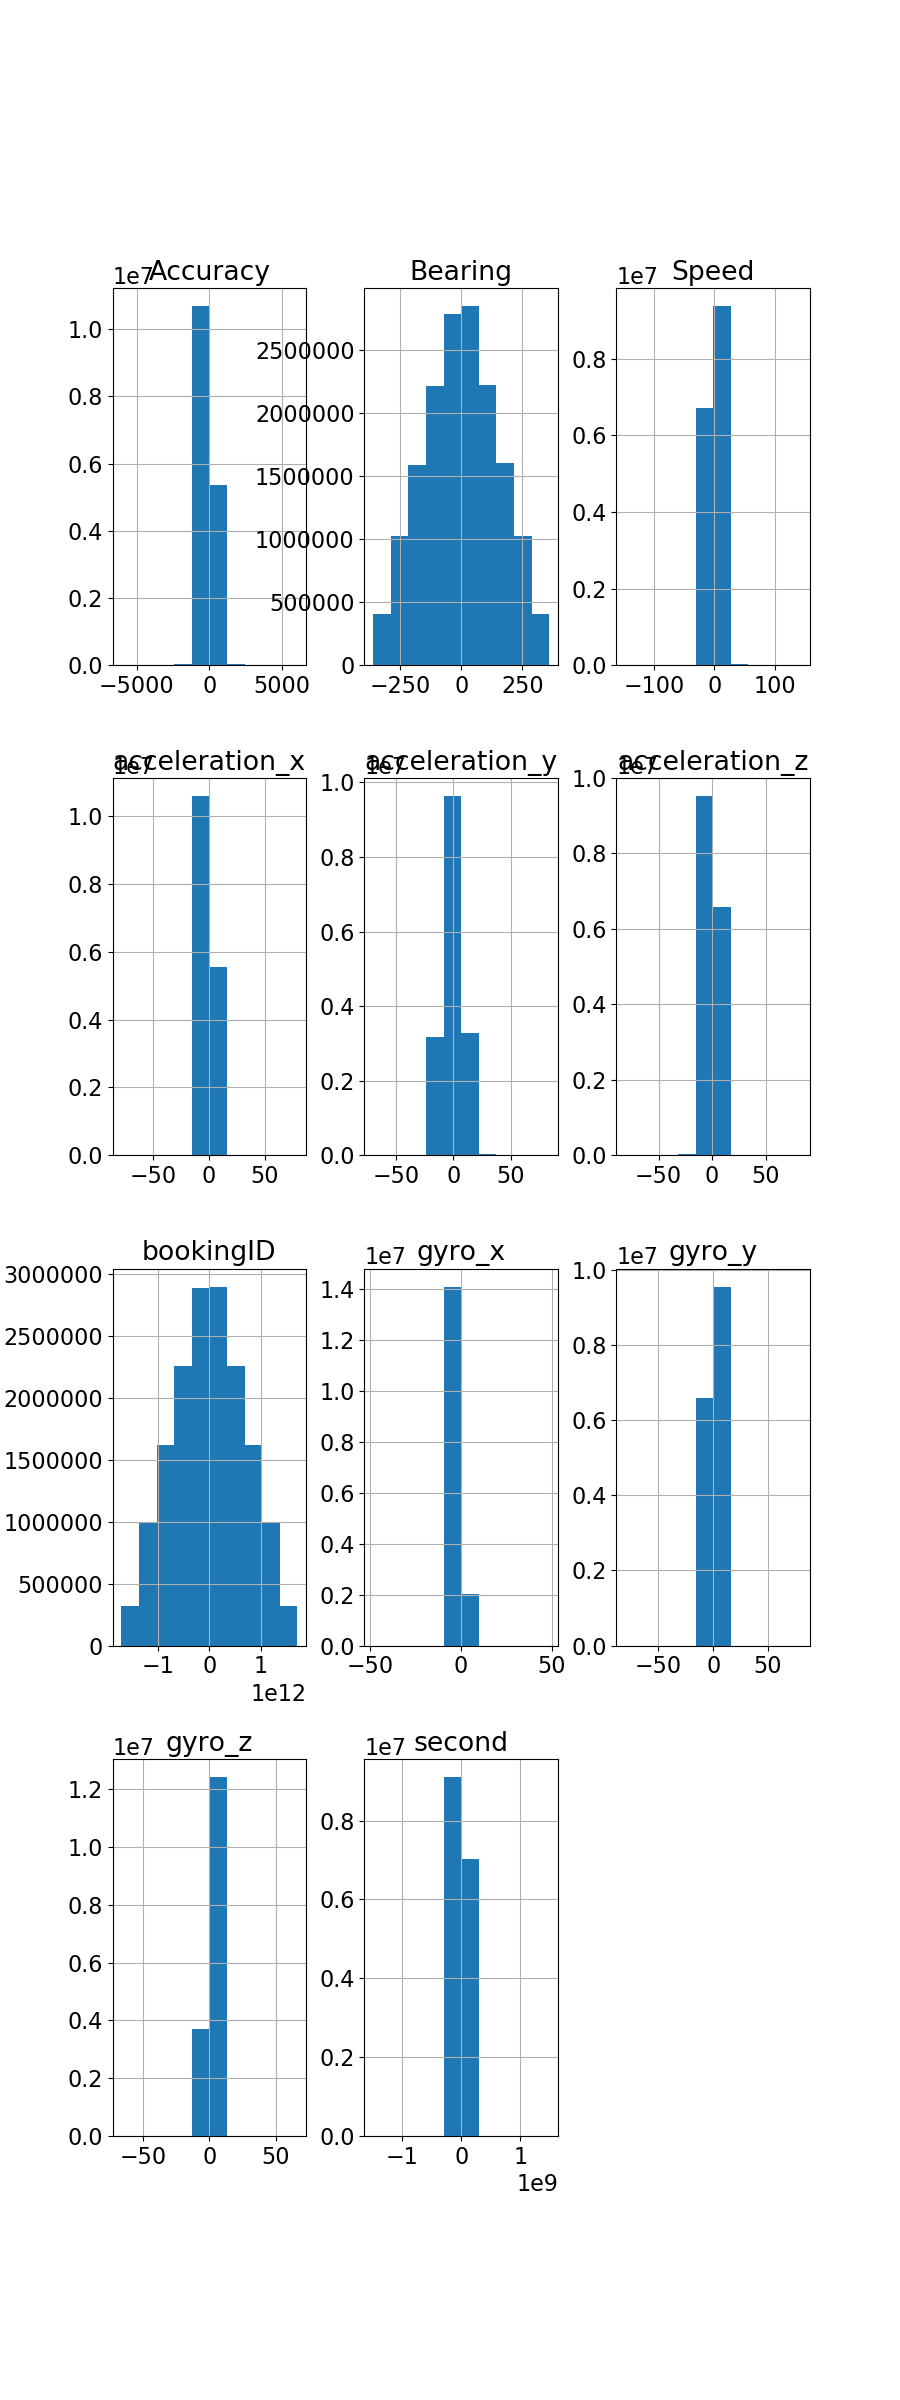

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028B8902FFD0>,
      dtype=object)

In [28]:
matplotlib.rcParams['figure.figsize'] = (9,24)

frame.diff().hist()